本教程包含三个例子，旨在解释basicRNNCell的数据输入和输出的结构。

### 预备知识：BasicRNNCell函数源码

源码解析
* num_units：t时刻隐藏层的神经元数量
* 属性state_size: Cell使用的State的大小  
* 属性output_size: RNNCell最后生成结果的大小  
* RNN类实现方法：__call__(self, inputs, state, scope=None)   
* **-- __call__函数输入**：inputs是一个形状为[batch_size*seq_len,input_size]  
batch_size：batch的大小，seq_len是序列长度，input_size是输入数据的维度   
state：rnn网络中cell的状态，用[batch_size,seq_len,state_size]来表示当前RNN网络的状态      
* **-- __call__函数输出**：output = new_state = activation(W * input + U * state + B)   
output：batch的大小和输出大小的结果，形状是（batch_size, seq_len, num_units）  
state：更新后的RNN状态，形状为[batch_size,state_size]


## 例1
输入是单个字母的onehot向量

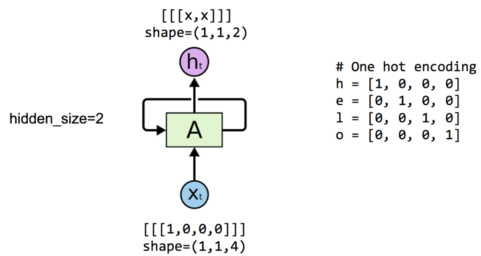

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
tf.set_random_seed(35) 
pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

In [3]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [4]:
with tf.variable_scope('one_cell') as scope:
    # One cell RNN input_dim (4) -> output_dim (2)
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size) 
    '''BasicRNNCell定义rnn cell个数和activition，默认是tanh。'''
    print(cell.output_size, cell.state_size)

    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1,0,0,0]]]
    pp.pprint(x_data)
    #将隐藏层cell链接起来，并循环更新state
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    print('all_states:')
    pp.pprint(outputs.eval())
    print('final_state:')
    pp.pprint(_states.eval())

2 2
array([[[ 1.,  0.,  0.,  0.]]], dtype=float32)
all_states:
array([[[-0.08805553,  0.18513305]]], dtype=float32)
final_state:
array([[-0.08805553,  0.18513305]], dtype=float32)


In [4]:
print('all_states:')

all_states:


**例1解析**  
假设：  
$s_0=[0,0]$   
$s_t=Ux_t+Ws_{t-1}$  
$\hat{y_t}=Vs_t$  
U、W、V中元素值全是1

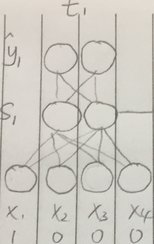

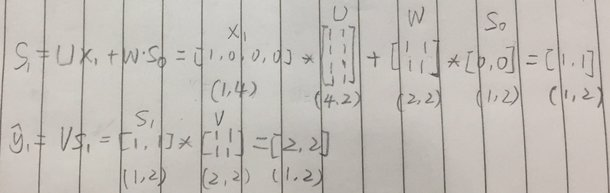

## 例2
输入是一个单词各字母的onehot向量

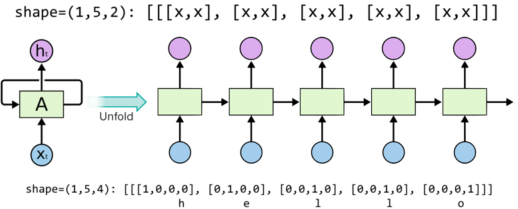

In [4]:
with tf.variable_scope('two_sequances') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
        
    x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
    print(x_data.shape)
    pp.pprint(x_data)
    outputs,_states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    print('all_states:')
    pp.pprint(outputs.eval())
    print('final_state:')
    pp.pprint(_states.eval())

(1, 5, 4)
array([[[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]]], dtype=float32)
all_states:
array([[[-0.68266326, -0.56970721],
        [-0.35789809, -0.09491055],
        [-0.18947123,  0.60249484],
        [-0.56423199,  0.41918814],
        [-0.1205189 , -0.36274698]]], dtype=float32)
final_state:
array([[-0.1205189 , -0.36274698]], dtype=float32)


**例2解析**  
假设：  
$s_0=[0,0]$   
$s_t=Ux_t+Ws_{t-1}$  
$\hat{y_t}=Vs_t$  
U、W、V中元素值全是1  

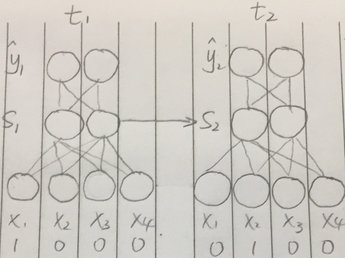

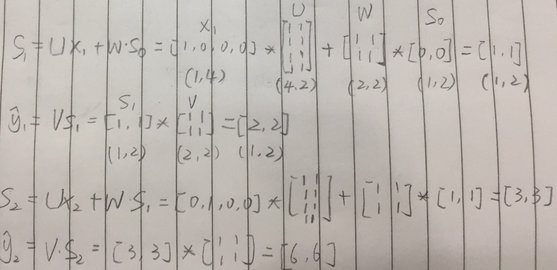

## 例3
输入是三个个单词各字母的onehot向量

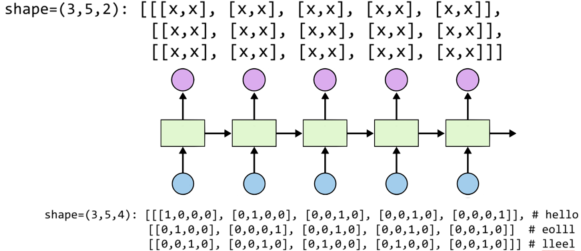

In [5]:
with tf.variable_scope('3_batches') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    print('all_states:')
    pp.pprint(outputs.eval())
    print('final_state:')
    pp.pprint(_states.eval())

array([[[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.]],

       [[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.]]], dtype=float32)
all_states:
array([[[-0.08320534, -0.00096798],
        [-0.0636618 ,  0.63576895],
        [-0.7802819 , -0.21678171],
        [-0.51978922,  0.54817873],
        [-0.50668752, -0.107708  ]],

       [[-0.07325502,  0.59450608],
        [-0.55725735, -0.4442471 ],
        [-0.45929366,  0.4696461 ],
        [-0.72882324,  0.14506362],
        [-0.6337294 ,  0.4315263 ]],

       [[-0.6420536 , -0.07202333],
        [-0.57682413,  0.43062454],
        [-0.20415276,  0.76512372],
        [-0.38131252,  0.54251033],
        [

### 参考文献
例子来源：https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-12-0-rnn_basics.ipynb  
RNN t时刻结构：http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/RNN%20(v2).pdf  
BasicRNNCell源码：http://blog.csdn.net/mebiuw/article/details/60780813  